# Introduction to Data Science: Custom Twitter Word Clouds

#### Step 1: Import the necessary packages

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import re
from twython import Twython
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image as im

#### Step 2: Collect the data

* The first step is to gain access to Twitter’s API by registering for an app to obtain the token keys for the API at https://dev.twitter.com/ 

* then creating a new app at https://apps.twitter.com/. 
    
* Once the app has been created, head over to “Keys and Access Tokens” to get the API Key and API Secret.

#### Step 3 : connect to the Twitter API with the Twython package in order to extract the raw Tweets from chosen user handle.

In [5]:
#Connect to Twitter
APP_KEY = "KVq08r8evvdYrCCHnkrQjceuo"
APP_SECRET = "jc3CqPNTFmzBvA7IVu7GZJ6S3zdfpGkz7QTJaZ3YU4qtp9UKaW"
twitter = Twython(APP_KEY, APP_SECRET)

#### Step 4 : Call the function on a user timeline. 
    
#### Note:
Twitter limits how far one can go back on a user’s timeline, which is 3200 at this point in time for free tier.

In [6]:
#Get timeline 
user_timeline=twitter.get_user_timeline(screen_name='Nike',count=1) 

In [7]:
user_timeline

[{'created_at': 'Sat Apr 20 21:03:56 +0000 2019',
  'id': 1119708299304349698,
  'id_str': '1119708299304349698',
  'text': '@iamobinnaoforah More to come. 💪',
  'truncated': False,
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [{'screen_name': 'iamobinnaoforah',
     'name': 'Mazi Obinna Oforah🇳🇬',
     'id': 44869846,
     'id_str': '44869846',
     'indices': [0, 16]}],
   'urls': []},
  'source': '<a href="https://www.sprinklr.com" rel="nofollow">Sprinklr</a>',
  'in_reply_to_status_id': 1119485214143782913,
  'in_reply_to_status_id_str': '1119485214143782913',
  'in_reply_to_user_id': 44869846,
  'in_reply_to_user_id_str': '44869846',
  'in_reply_to_screen_name': 'iamobinnaoforah',
  'user': {'id': 415859364,
   'id_str': '415859364',
   'name': 'Nike',
   'screen_name': 'Nike',
   'location': 'Beaverton, Oregon',
   'description': 'Just Do It.',
   'url': 'https://t.co/RBhnlkkzPV',
   'entities': {'url': {'urls': [{'url': 'https://t.co/RBhnlkkzPV',
       '

In [8]:
#get most recent id
last_id = user_timeline[0]['id']-1
last_id 

1119708299304349697

In [9]:
for i in range(16):
    batch = twitter.get_user_timeline(screen_name='Nike',count=200, max_id=last_id)
    user_timeline.extend(batch)
    last_id = user_timeline[-1]['id'] - 1

In [12]:
user_timeline[:5]

[{'created_at': 'Sat Apr 20 21:03:56 +0000 2019',
  'id': 1119708299304349698,
  'id_str': '1119708299304349698',
  'text': '@iamobinnaoforah More to come. 💪',
  'truncated': False,
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [{'screen_name': 'iamobinnaoforah',
     'name': 'Mazi Obinna Oforah🇳🇬',
     'id': 44869846,
     'id_str': '44869846',
     'indices': [0, 16]}],
   'urls': []},
  'source': '<a href="https://www.sprinklr.com" rel="nofollow">Sprinklr</a>',
  'in_reply_to_status_id': 1119485214143782913,
  'in_reply_to_status_id_str': '1119485214143782913',
  'in_reply_to_user_id': 44869846,
  'in_reply_to_user_id_str': '44869846',
  'in_reply_to_screen_name': 'iamobinnaoforah',
  'user': {'id': 415859364,
   'id_str': '415859364',
   'name': 'Nike',
   'screen_name': 'Nike',
   'location': 'Beaverton, Oregon',
   'description': 'Just Do It.',
   'url': 'https://t.co/RBhnlkkzPV',
   'entities': {'url': {'urls': [{'url': 'https://t.co/RBhnlkkzPV',
       '

In [16]:
count = 0
for items in user_timeline:
    if count <=5:
        print(items['text'])
    count +=1


@iamobinnaoforah More to come. 💪
@triplebeams22 Way to push through the pain. 👊
@noamseg We'll be here all along the way; the first one is always the hardest. 💪
@jim_gruhn Keep putting in the work. 💪 https://t.co/XGy3d3UHjh
@shidume Unfortunately, our Reuse-A-Shoe program is only available at select Nike and Converse factory stores. We r… https://t.co/huzKq75d6k
@IntegranWo No news to share at this time, Fernando. Be sure to check out our current Air Max collection, and stay… https://t.co/05Ipw4z5JE


#### Step 5 : Extract text fields from  the tweets

We can see that the “text” field of each tweet contains the information we need. Furthermore, it appears that our timeline data is a list of dictionaries, so we can iterate through the list and grab each value with the “text” key.

In [17]:
#Extract textfields from tweets
raw_tweets = []
for tweets in user_timeline:
    raw_tweets.append(tweets['text'])

In [18]:
raw_tweets[:5]

['@iamobinnaoforah More to come. 💪',
 '@triplebeams22 Way to push through the pain. 👊',
 "@noamseg We'll be here all along the way; the first one is always the hardest. 💪",
 '@jim_gruhn Keep putting in the work. 💪 https://t.co/XGy3d3UHjh',
 '@shidume Unfortunately, our Reuse-A-Shoe program is only available at select Nike and Converse factory stores. We r… https://t.co/huzKq75d6k']

#### Step 6: Clean all the data

In [30]:
#Create a string form of our list of text
raw_string = ''.join(raw_tweets)
no_links = re.sub(r'http\S+','', raw_string)
no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)

In [31]:
no_special_characters 

'iamobinnaoforah More to come triplebeams Way to push through the pain noamseg Well be here all along the way the first one is always the hardest jimgruhn Keep putting in the work   Unfortunately our ReuseAShoe program is only available at select Nike and Converse factory stores We r  No news to share at this time Fernando Be sure to check out our current Air Max collection and stay  Makin it look easy  We appreciate your interest Kaeden If youre looking to become an authorized retailer of Nike you  We are ready for your next thousand mile journey Rofuaz Vaya lamentamos ver eso Nos podras decir dondecuando realizaste el pedido y si fue online enviarnos  Hola Victoria genial que quieras unirte a nuestra familia Tenemos que comentarte que actualmente es  Ruth te hemos enviado un email con la etiqueta y las instrucciones para tramitar la devolucin de forma to  It was worth itTxxr Gear Miles See you on Friday Tygodleymackie Weve got options   Hey Michela thanks for reaching out While we ce

In [32]:
#Remove stopwords
words = no_special_characters.split(" ")
words = [w for w in words if len(w)>2]
words = [w.lower() for w in words]
print(words)

['iamobinnaoforah', 'more', 'come', 'triplebeams', 'way', 'push', 'through', 'the', 'pain', 'noamseg', 'well', 'here', 'all', 'along', 'the', 'way', 'the', 'first', 'one', 'always', 'the', 'hardest', 'jimgruhn', 'keep', 'putting', 'the', 'work', 'unfortunately', 'our', 'reuseashoe', 'program', 'only', 'available', 'select', 'nike', 'and', 'converse', 'factory', 'stores', 'news', 'share', 'this', 'time', 'fernando', 'sure', 'check', 'out', 'our', 'current', 'air', 'max', 'collection', 'and', 'stay', 'makin', 'look', 'easy', 'appreciate', 'your', 'interest', 'kaeden', 'youre', 'looking', 'become', 'authorized', 'retailer', 'nike', 'you', 'are', 'ready', 'for', 'your', 'next', 'thousand', 'mile', 'journey', 'rofuaz', 'vaya', 'lamentamos', 'ver', 'eso', 'nos', 'podras', 'decir', 'dondecuando', 'realizaste', 'pedido', 'fue', 'online', 'enviarnos', 'hola', 'victoria', 'genial', 'que', 'quieras', 'unirte', 'nuestra', 'familia', 'tenemos', 'que', 'comentarte', 'que', 'actualmente', 'ruth', 'he

#### Step 7 : Visualize the data

Pick any of your favorite images to use as a background image! (Pro tip: works better with larger images with a white background)

In [35]:
mask = np.array(Image.open(r'C:\Users\INTEL\Desktop\NLP\WordCloud\nike.jpeg'))

#### Step 8 : Create the word cloud instance

In [44]:
wc = WordCloud(background_color="white", max_words=2000, mask=mask)
clean_string = ','.join(words)
wc.generate(clean_string)

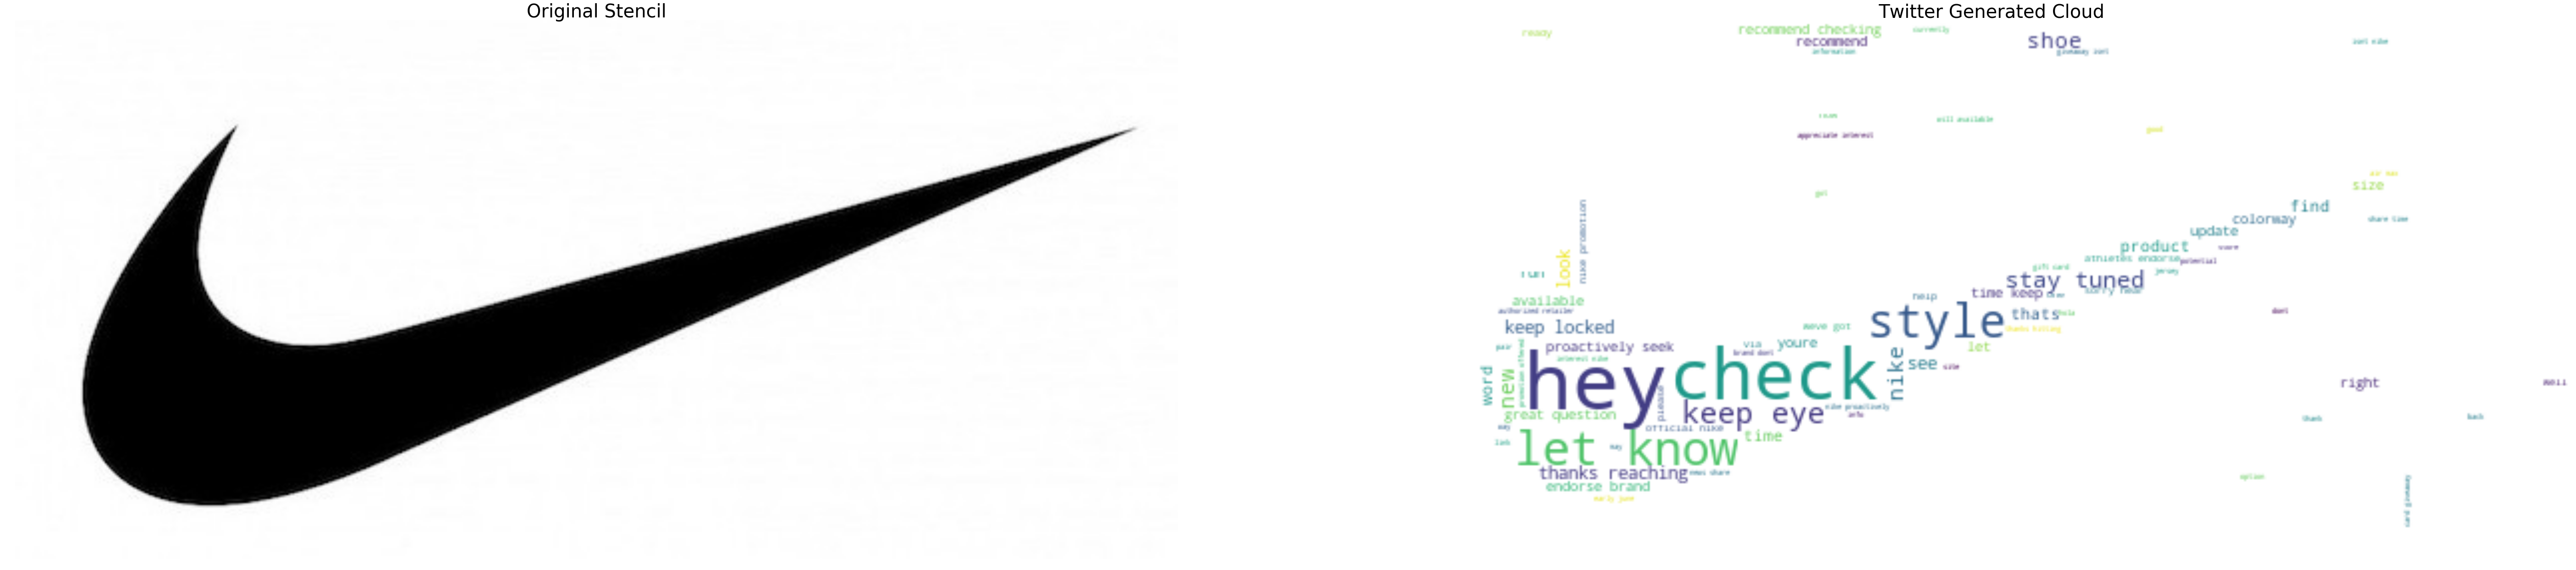

In [45]:
f = plt.figure(figsize=(100,100))
f.add_subplot(1,2, 1)
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.title('Original Stencil', size=40)
plt.axis("off")
f.add_subplot(1,2, 2)
plt.imshow(wc, interpolation='bilinear')
plt.title('Twitter Generated Cloud', size=40)
plt.axis("off")
plt.show()

#### Note:
https://medium.com/@shsu14/introduction-to-data-science-custom-twitter-word-clouds-704ec5538f46

In [46]:
wc1 = WordCloud()
wc1.generate(clean_string)

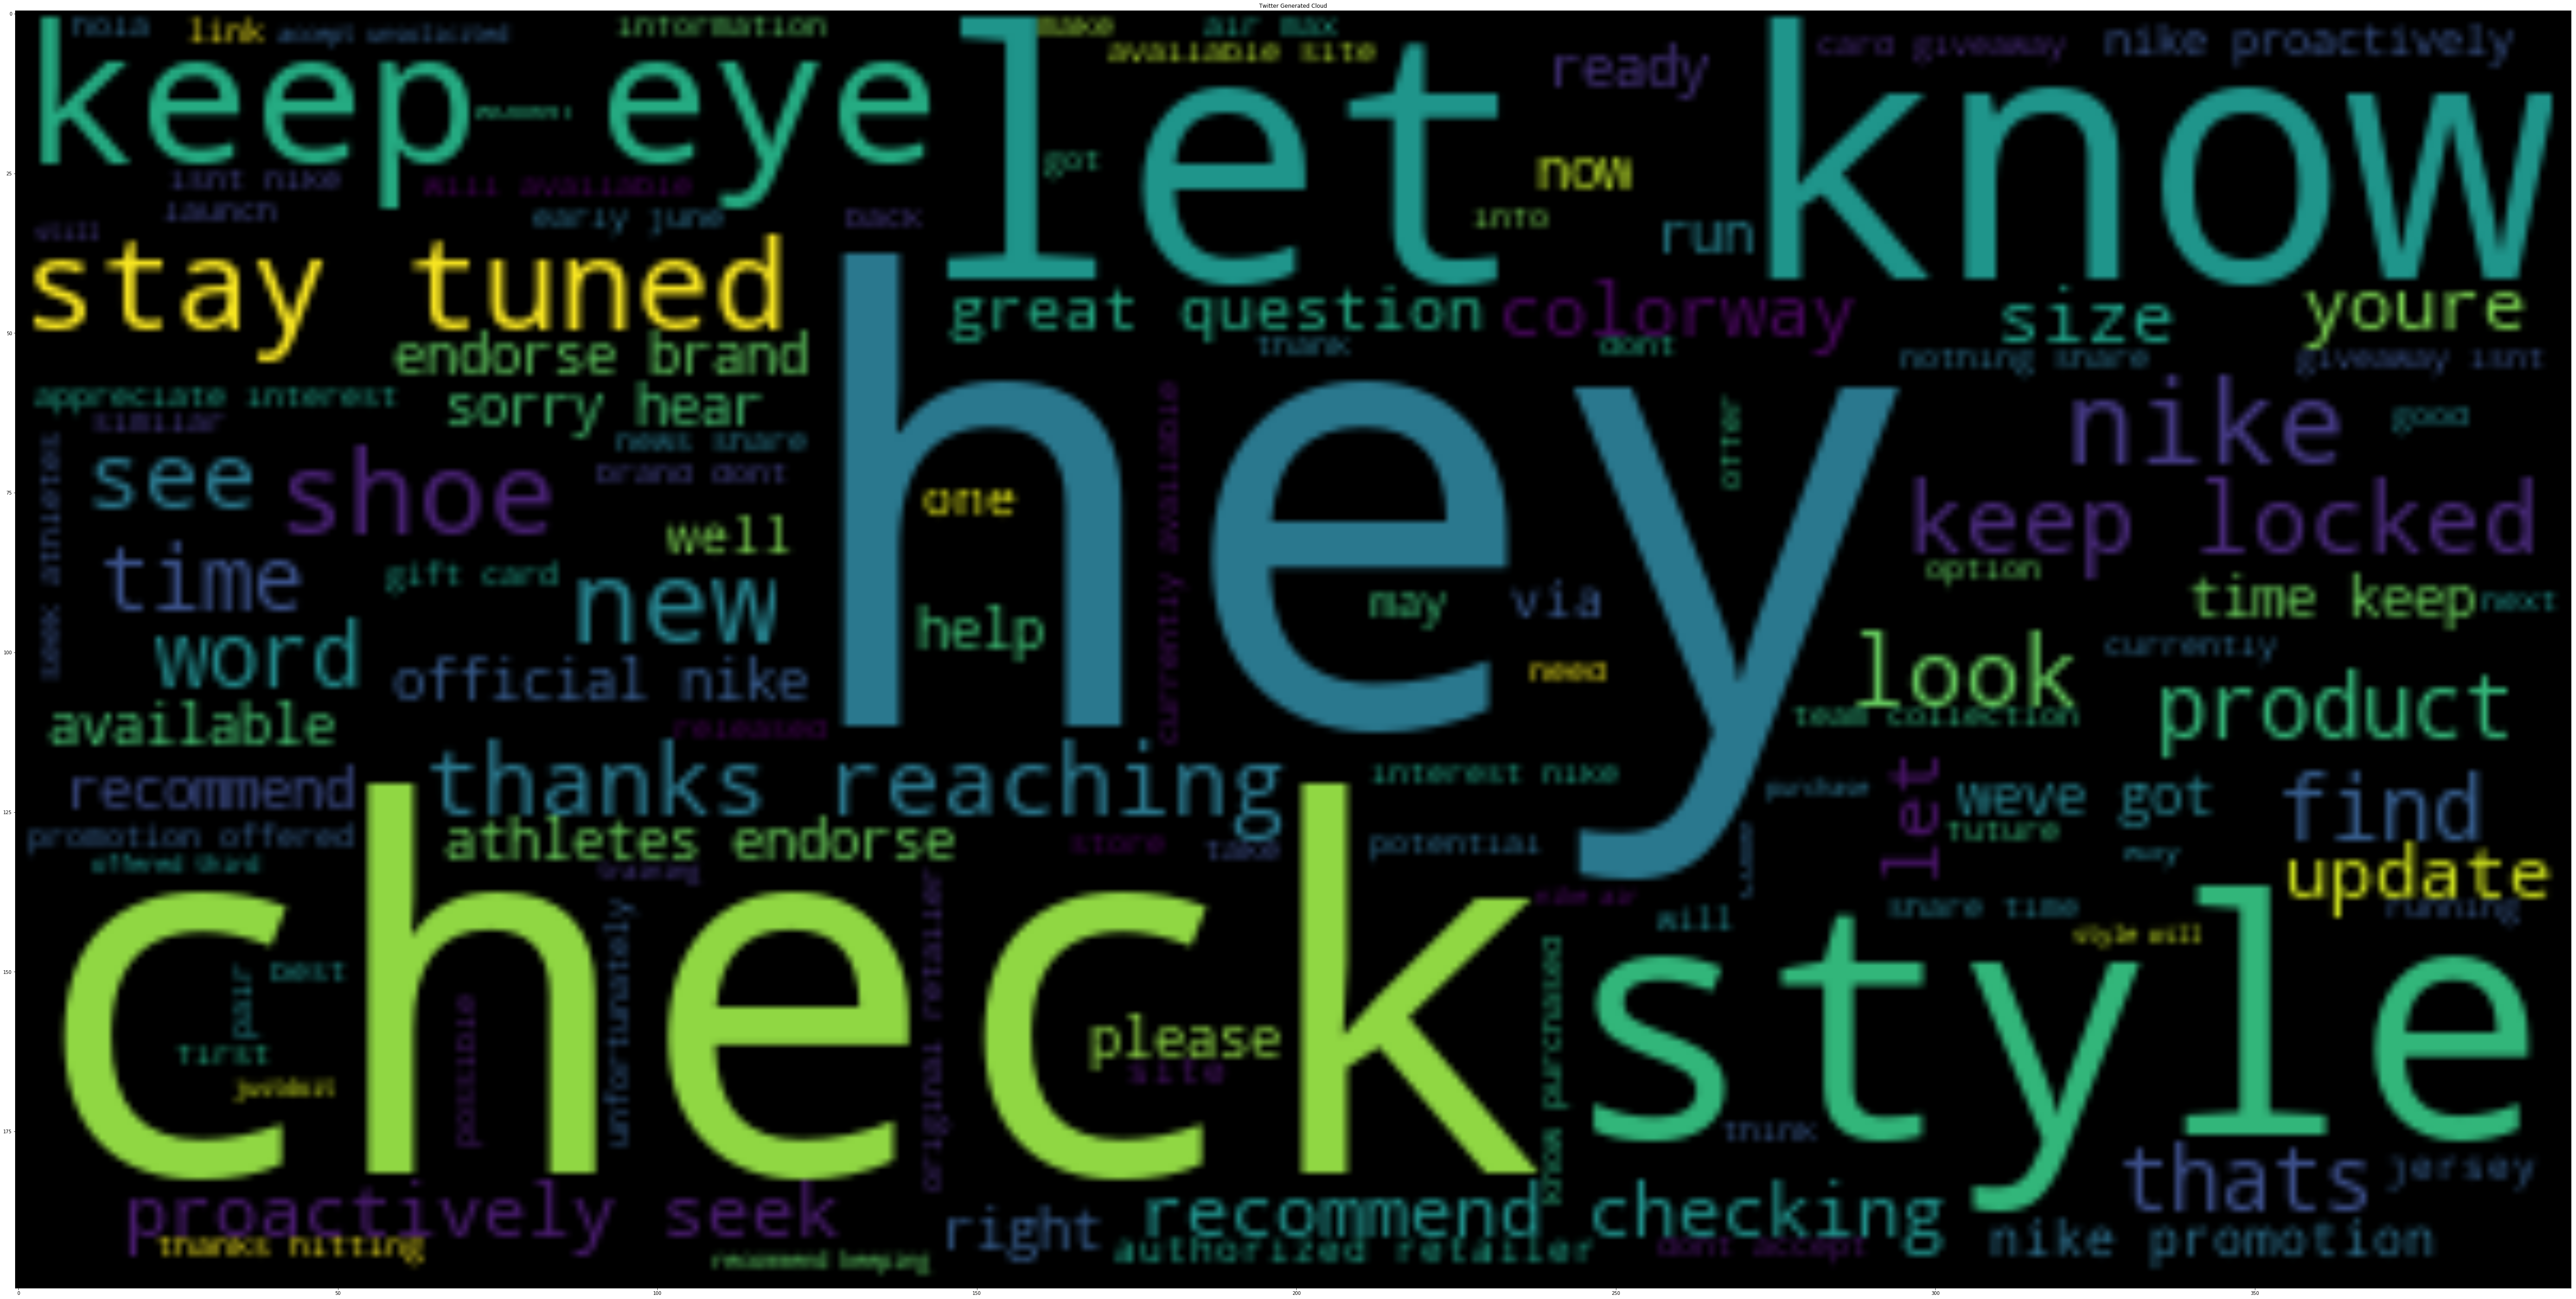

In [52]:
plt.figure(figsize=(100,100))
plt.imshow(wc1, interpolation='bilinear')
plt.title('Twitter Generated Cloud')
plt.show()